<a href="https://colab.research.google.com/github/areegtarek/PySpark-Social-Media-sentiment-analysis/blob/main/PySpark_Social_Media_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting Up the Environment

**Checking Java Version**

In [ ]:
! java -version

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)


In [ ]:
!sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,000 kB]
Hit:14 http://ppa.launchpad.net/graph

**Setting Java 8 Environment**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u352-ga-1~20.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u352-ga-1~20.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u352-ga-1~20.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u352-ga-1~20.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u352-ga-1~20.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up openjdk-8-jdk-headless:amd64 (8u352-ga-1~20

In [ ]:
!sudo update-alternatives --config java # We choose Selection 2- java-8-openjdk-amd64

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


**Downloading Spark**

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

**Extracting Spark Files**

In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

**Install FindSpark**

In [ ]:
!pip install -q findspark

**Install Pyspark**

In [ ]:
! pip install --ignore-installed -q pyspark==2.4.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 KB 16.9 MB/s eta 0:00:00


**Setting Up Home Environment**

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

**Creating Spark Session**

In [ ]:
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Project 2-SocialMedia-Analytics").config('spark.sql.execution.arrow.pyspark.enabled', True).config('spark.sql.session.timeZone', 'UTC').config('spark.driver.memory','32G').config('spark.ui.showConsoleProgress', True).config('spark.sql.repl.eagerEval.enabled', True).getOrCreate()

#Getting The Data and Import Libraries

In [ ]:
!pip install opendatasets --upgrade --quiet

**Importing The Required Libiaries**

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.feature import HashingTF, Tokenizer, StopWordsRemover
import opendatasets as od
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from pyspark.ml.classification import LogisticRegression

**Downloading The Dataset "sentiment140" from Kaggle**

In [ ]:
od.download("https://www.kaggle.com/datasets/kazanova/sentiment140")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dekaito
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:00<00:00, 140MB/s]


In [ ]:
df = spark.read.csv("/content/sentiment140/training.1600000.processed.noemoticon.csv", header = False, encoding = "ISO-8859-1")

In [ ]:
df.show(n = 10)

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       _c1|                 _c2|     _c3|            _c4|                 _c5|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|  0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|  0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|  0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|  0|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nop

# Data Preprocessing

In [ ]:
url = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
user = '@[^\s]+'
alpha = "[^a-zA-Z0-9]"

In [ ]:
#Selecting the related Columns
df2 = df.select(col('_c5').alias("Tweets"), col('_c0').cast("Int").alias("Label"))

In [ ]:
#Cleaining The Data
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "don't", "do not"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "won't", "will not"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "'re", " are"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "i'm", "i am"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "'m", " am"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "let's", "let us"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "'s", " is"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "'ve", " have"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "can't", "can not"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "shan't", "shall not"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "n't", " not"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "'d", " would"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), "'ll", " will"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), url, "URL"))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), user, " "))
df2 = df2.withColumn('Tweets', regexp_replace(col('Tweets'), alpha, " "))
processed_df = df2.withColumn('Tweets', trim(col('Tweets')))

In [ ]:
processed_df.show(n = 10)

+--------------------+-----+
|              Tweets|Label|
+--------------------+-----+
|URL   Awww  that ...|    0|
|is upset that he ...|    0|
|I dived many time...|    0|
|my whole body fee...|    0|
|no  it is not beh...|    0|
|  not the whole crew|    0|
|          Need a hug|    0|
|hey  long time no...|    0|
|nope they did not...|    0|
|        que me muera|    0|
+--------------------+-----+
only showing top 10 rows



In [ ]:
processed_df.count()

1600000

# Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

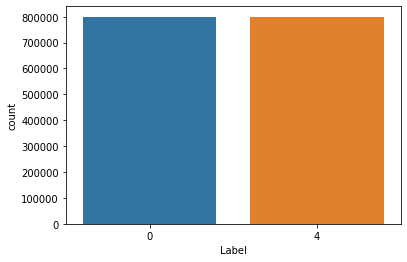

In [ ]:
df3 = processed_df.select(["Label"])
df_plot = df3.toPandas()

#Plotting the Labels (0: Negative , 4:Postive)
sns.countplot("Label",data=df_plot)

**Most Used Words for the Negative Class**

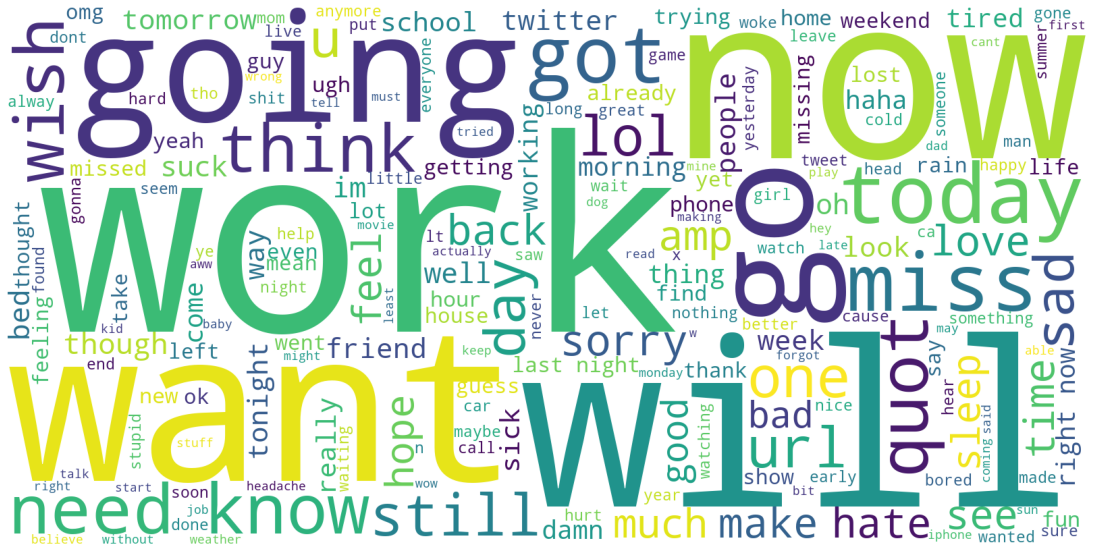

In [ ]:
df4 = processed_df.select(["Tweets"])
df_cloud = df4.toPandas()
data_neg = df_cloud[:800000]
tweets_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data_neg.Tweets:

    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    tweets_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tweets_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Most Used Words for the Postive Class**

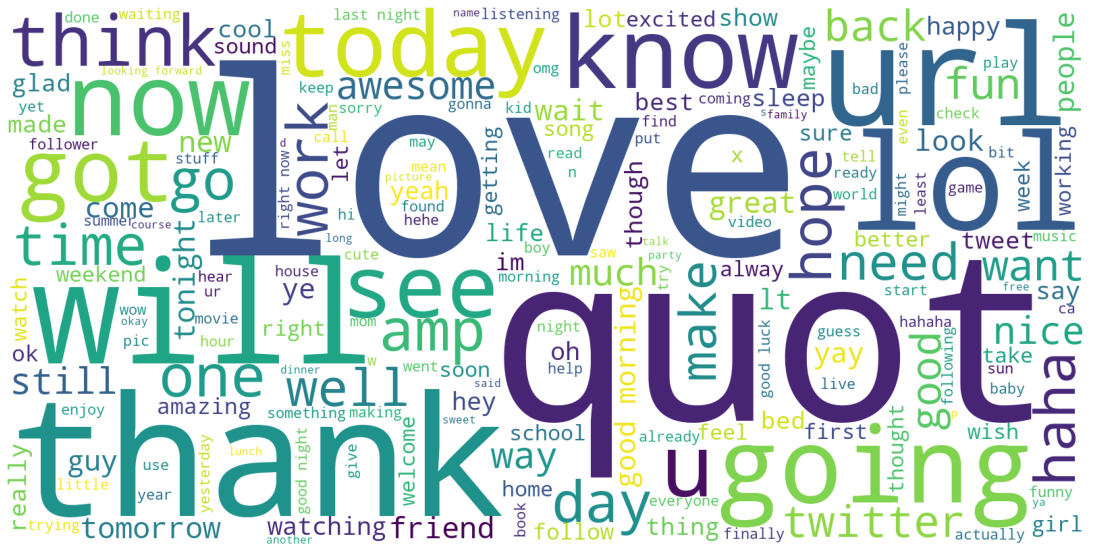

In [ ]:
data_pos = df_cloud[800000:]
tweets_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data_pos.Tweets:

    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    tweets_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tweets_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#Preparing Training and Testing Data

**Divide Data to Training and Testing**

In [ ]:
df_pd = processed_df.toPandas()
# splitting the data to train and test splits by ratio 80:20
df_pd = df_pd.sample(frac = 1)
splitIndex=int(1600000*0.8)
# create two holders for the training data and testing data
training_df=df_pd[:splitIndex]
testing_df=df_pd[splitIndex:]
# Then convert it to Spark DataFrame again
training=spark.createDataFrame(training_df)
testing=spark.createDataFrame(testing_df)

In [ ]:
print("Training Data: ",training.count(),"\t","Testing Data: ",testing.count())

Training Data:  1280000 	 Testing Data:  320000


**Seperate Tweets into individual Words using Tokenizer, Then use Stopwords and HashTF For Training and Testing Data**

In [ ]:
tokenizer = Tokenizer(inputCol = "Tweets", outputCol = "TokenizedTweets")
tokenizedTraining = tokenizer.transform(training)

In [ ]:
tokenizedTraining.show(n = 20)

+--------------------+-----+--------------------+
|              Tweets|Label|     TokenizedTweets|
+--------------------+-----+--------------------+
|I do not think sh...|    0|[i, do, not, thin...|
|idk    some rando...|    0|[idk, , , , some,...|
|themirror can lie...|    4|[themirror, can, ...|
|but I will get fi...|    0|[but, i, will, ge...|
|i know but its ju...|    0|[i, know, but, it...|
|Homeeeesie  Back ...|    0|[homeeeesie, , ba...|
|  stop being cryptic|    0|[stop, being, cry...|
|Hey Rob  how do I...|    0|[hey, rob, , how,...|
|me too  im about ...|    0|[me, too, , im, a...|
|Oh god     I have...|    0|[oh, god, , , , ,...|
|It is time to try...|    4|[it, is, time, to...|
|waiting in the li...|    0|[waiting, in, the...|
|NO WAY   I am in ...|    4|[no, way, , , i, ...|
|Thanks again  I w...|    4|[thanks, again, ,...|
|heading to the la...|    4|[heading, to, the...|
|Damn it all  I do...|    0|[damn, it, all, ,...|
|my pleasure  hope...|    4|[my, pleasure, , ...|


In [ ]:
stopWords = StopWordsRemover(inputCol = "TokenizedTweets", outputCol = "RemovedTweets")
stopWordsTraining = stopWords.transform(tokenizedTraining)

In [ ]:
stopWordsTraining.show(n = 10)

+--------------------+-----+--------------------+--------------------+
|              Tweets|Label|     TokenizedTweets|       RemovedTweets|
+--------------------+-----+--------------------+--------------------+
|I do not think sh...|    0|[i, do, not, thin...|[think, anymore, ...|
|idk    some rando...|    0|[idk, , , , some,...|[idk, , , , rando...|
|themirror can lie...|    4|[themirror, can, ...|[themirror, lie, ...|
|but I will get fi...|    0|[but, i, will, ge...|  [get, fiiiiiiired]|
|i know but its ju...|    0|[i, know, but, it...|[know, rude, , ah...|
|Homeeeesie  Back ...|    0|[homeeeesie, , ba...|[homeeeesie, , ba...|
|  stop being cryptic|    0|[stop, being, cry...|     [stop, cryptic]|
|Hey Rob  how do I...|    0|[hey, rob, , how,...|[hey, rob, , get,...|
|me too  im about ...|    0|[me, too, , im, a...|[, im, travel, 7,...|
|Oh god     I have...|    0|[oh, god, , , , ,...|[oh, god, , , , ,...|
+--------------------+-----+--------------------+--------------------+
only s

In [ ]:
hashTF = HashingTF(inputCol = "RemovedTweets", outputCol = "FeaturesTweets")
numericTraining = hashTF.transform(stopWordsTraining).select("Label", "RemovedTweets", "FeaturesTweets")

In [ ]:
numericTraining.show(n = 10)

+-----+--------------------+--------------------+
|Label|       RemovedTweets|      FeaturesTweets|
+-----+--------------------+--------------------+
|    0|[think, anymore, ...|(262144,[5381,853...|
|    0|[idk, , , , rando...|(262144,[31015,43...|
|    4|[themirror, lie, ...|(262144,[15539,19...|
|    0|  [get, fiiiiiiired]|(262144,[240634,2...|
|    0|[know, rude, , ah...|(262144,[22346,24...|
|    0|[homeeeesie, , ba...|(262144,[59243,77...|
|    0|     [stop, cryptic]|(262144,[85673,20...|
|    0|[hey, rob, , get,...|(262144,[21653,34...|
|    0|[, im, travel, 7,...|(262144,[9129,178...|
|    0|[oh, god, , , , ,...|(262144,[18184,38...|
+-----+--------------------+--------------------+
only showing top 10 rows



# Train and Predict The Model Using LogisticRegression

In [ ]:
lr = LogisticRegression(labelCol = "Label", featuresCol = "FeaturesTweets", maxIter = 10, regParam = 0.01)
model = lr.fit(numericTraining)

In [ ]:
tokenizedTesting = tokenizer.transform(testing)
stopWordsTesting = stopWords.transform(tokenizedTesting)
numericTesting = hashTF.transform(stopWordsTesting).select("Label", "RemovedTweets", "FeaturesTweets")
numericTesting.show(n = 10)

+-----+--------------------+--------------------+
|Label|       RemovedTweets|      FeaturesTweets|
+-----+--------------------+--------------------+
|    0|    [wanna, go, zoo]|(262144,[95697,14...|
|    0|[work, work, work...|(262144,[29129,31...|
|    4|[sort, , gt, , , ...|(262144,[113432,1...|
|    4|[goooooood, morni...|(262144,[8145,400...|
|    4|[things, really, ...|(262144,[2565,315...|
|    0|[omgosh, 6, month...|(262144,[1546,284...|
|    4|[heating, left, p...|(262144,[15480,11...|
|    0|[class, next, two...|(262144,[24698,34...|
|    0|[100, , , , rathe...|(262144,[17893,87...|
|    4|[hahahaha, , good...|(262144,[1512,855...|
+-----+--------------------+--------------------+
only showing top 10 rows



**Model Prediction**

In [ ]:
predict = model.transform(numericTesting)
prediction = predict.select("Label", "prediction", "FeaturesTweets")
prediction.show(n = 10)

+-----+----------+--------------------+
|Label|prediction|      FeaturesTweets|
+-----+----------+--------------------+
|    0|       0.0|(262144,[95697,14...|
|    0|       0.0|(262144,[29129,31...|
|    4|       4.0|(262144,[113432,1...|
|    4|       4.0|(262144,[8145,400...|
|    4|       0.0|(262144,[2565,315...|
|    0|       0.0|(262144,[1546,284...|
|    4|       0.0|(262144,[15480,11...|
|    0|       0.0|(262144,[24698,34...|
|    0|       0.0|(262144,[17893,87...|
|    4|       4.0|(262144,[1512,855...|
+-----+----------+--------------------+
only showing top 10 rows



#Model Accuracy and visualization

In [ ]:
from sklearn.metrics import confusion_matrix
y = prediction.select("Label","prediction").toPandas()
y_hat = y["prediction"]
y_act = y["Label"]
cf_matrix = confusion_matrix(y_hat, y_act)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159736
           4       0.75      0.78      0.76    160264

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Accuracy 76.11% 





Text(0.5, 1.0, 'Confusion Matrix')

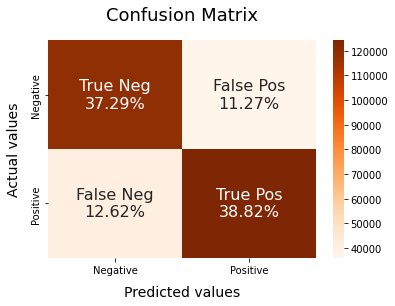

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_act,y_hat))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_act, y_hat)),"\n\n\n")

# Plotting the Confusion Matrix
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Oranges',fmt = '', xticklabels = categories, yticklabels = categories, annot_kws={"fontsize":16})
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**the Logistic Regression Model achieves nearly 76.2% accuracy while classifying the sentiment of a tweet.**